In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import json
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.io as pio


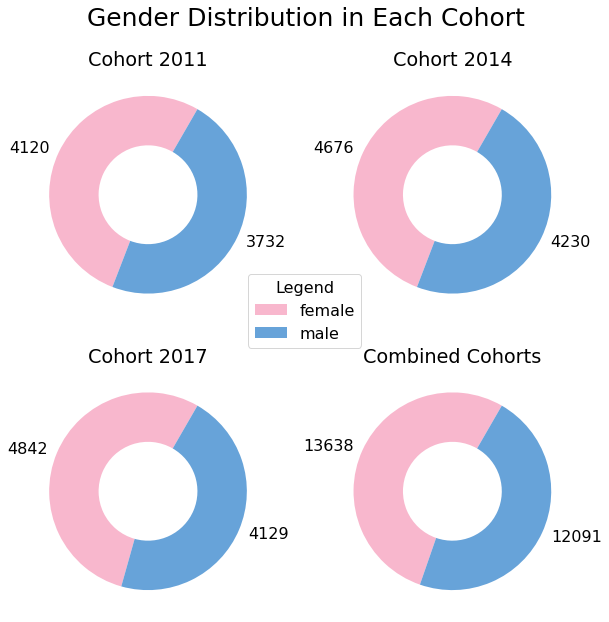

In [43]:
# Cohort 2011, 2014, 2017, and combined
font_color = 'black'
colors = ['#F8B7CD', '#67A3D9']
values = [[4120, 3732], [4676, 4230], [4842, 4129], [4120+4676+4842, 3732+4230+4129]]
labels = ['female', 'male']
titles = ['Cohort 2011', 'Cohort 2014', 'Cohort 2017', 'Combined Cohorts']
# Create subplots and a pie chart
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
for i, ax in enumerate(axs.flat):
    ax.pie(values[i], colors=colors, labels=values[i], wedgeprops=dict(width=0.5), startangle=60)
    ax.set_title(titles[i])
# Set title, its position, and font size
fig.suptitle('Gender Distribution in Each Cohort', x=0.52, y=.97, fontsize=25, color=font_color)
fig.legend(labels, title='Legend', loc='center')
fig.patch.set_facecolor('white')
filename = 'population-gender-donut-chart'
plt.savefig(filename+'.png', transparent=True)


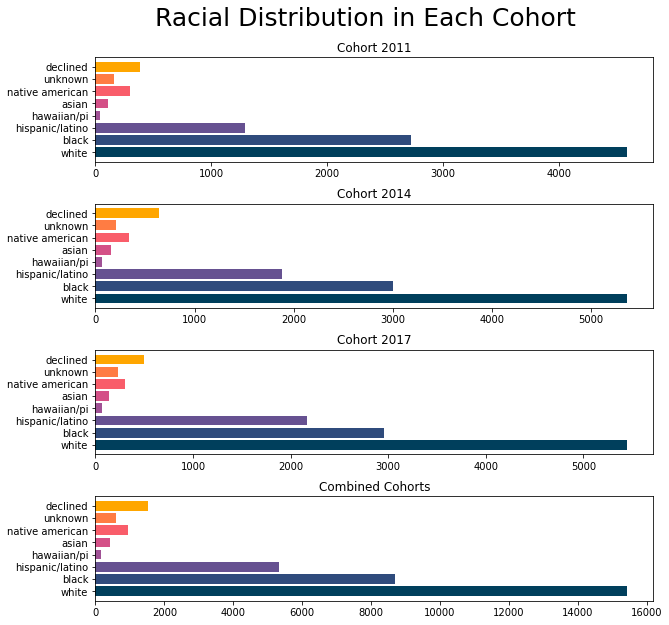

In [34]:
# Horizontal Bar 
font_color = 'black'
colors = ['#003f5c','#2f4b7c','#665191','#a05195','#d45087','#f95d6a','#ff7c43','#ffa600']
values = [[4584, 2721, 1289, 40, 109, 301, 158, 382], 
          [5364, 3008, 1879, 63, 161, 343, 203, 645],
          [5447, 2956, 2168, 70, 143, 304, 228, 494], 
          [4584+5364+5477, 2721+3008+2956, 1289+1879+2168, 40+63+70, 109+161+143, 301+343+304, 158+203+228, 382+645+494]]
labels = ('white', 'black', 'hispanic/latino', 'hawaiian/pi', 'asian', 'native american', 'unknown', 'declined')
titles = ['Cohort 2011', 'Cohort 2014', 'Cohort 2017', 'Combined Cohorts']
# Create subplots and a pie chart
fig, axs = plt.subplots(4, 1, figsize=(10, 10))
for i, ax in enumerate(axs.flat):
    ax.barh(labels, values[i], align='center', color=colors)
    ax.set_title(titles[i])
# # Set title, its position, and font size
fig.suptitle('Racial Distribution in Each Cohort', x=0.5, y=.95, fontsize=25, color=font_color)
fig.patch.set_facecolor('white')
fig.subplots_adjust(wspace=2, hspace=0.4) 
filename = 'racial-distribution-barchart'
plt.savefig(filename+'.png', transparent=True)


In [85]:
C11 = pd.read_csv('/Users/summerlong/hsgrad/data/Cohort_2011.csv')
C14 = pd.read_csv('/Users/summerlong/hsgrad/data/Cohort_2014.csv')
C17 = pd.read_csv('/Users/summerlong/hsgrad/data/Cohort_2017.csv')
CC = pd.read_csv('/Users/summerlong/hsgrad/data/Combined_Cohorts.csv')
C11.loc[C11['state'] == 'West Virgina', 'state'] = 'West Virginia'
C14.loc[C14['state'] == 'West Virgina', 'state'] = 'West Virginia'
C17.loc[C17['state'] == 'West Virgina', 'state'] = 'West Virginia'
CC.loc[CC['state'] == 'West Virgina', 'state'] = 'West Virginia'


In [86]:
state_code_dict = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
    'District of Columbia': 'DC'
}


In [87]:
CC['state'] = CC['state'].map(state_code_dict)
C11['state'] = C11['state'].map(state_code_dict)
C14['state'] = C14['state'].map(state_code_dict)
C17['state'] = C17['state'].map(state_code_dict)


In [88]:
CC['participation'] = (CC['participation'] * 100)

fig = px.choropleth(
    data_frame=CC,
    locationmode='USA-states',
    locations='state', # column in the data frame containing the state name
    scope='usa',
    color='participation', # column in the data frame containing the values to be plotted
    color_continuous_scale='Purples', # set the color scale
    range_color=[0, 80], # set the range of the color scale
    labels={'value':'percent of partiticipation'}, # set the label for the color scale
)

fig.update_layout(
    title_text='Combined Cohorts Percentage of Baseline Population Participation at Age 19',
    title_font_size=25,
    title_x=0.5,
    geo=dict(bgcolor='rgba(0,0,0,0)', lakecolor='rgba(0, 0, 0, 0)'),
    legend_title_font_size=14,
    height=800,
    width=1000,
     paper_bgcolor='rgba(0,0,0,0)',  # transparent background
    plot_bgcolor='rgba(0,0,0,0)'    # transparent plot area
)

pio.write_html(fig, file='plot.html')

In [90]:
fig = px.choropleth(
    data_frame=CC,
    locationmode='USA-states',
    locations='state', # column in the data frame containing the state name
    scope='usa',
    color='percent', # column in the data frame containing the values to be plotted
    color_continuous_scale='Purples', # set the color scale
    range_color=[0, 100], # set the range of the color scale
    labels={'value':'graduation'}, # set the label for the color scale
)

fig.update_layout(
    title_text='Combined Cohorts Graduation Rate at Age 19',
    title_font_size=25,
    title_x=0.5,
    geo=dict(bgcolor='rgba(0,0,0,0)', lakecolor='rgba(0, 0, 0, 0)'),
    legend_title_font_size=14,
    height=800,
    width=1000,
     paper_bgcolor='rgba(0,0,0,0)',  # transparent background
    plot_bgcolor='rgba(0,0,0,0)'    # transparent plot area
)

pio.write_html(fig, file='grad_plot.html')

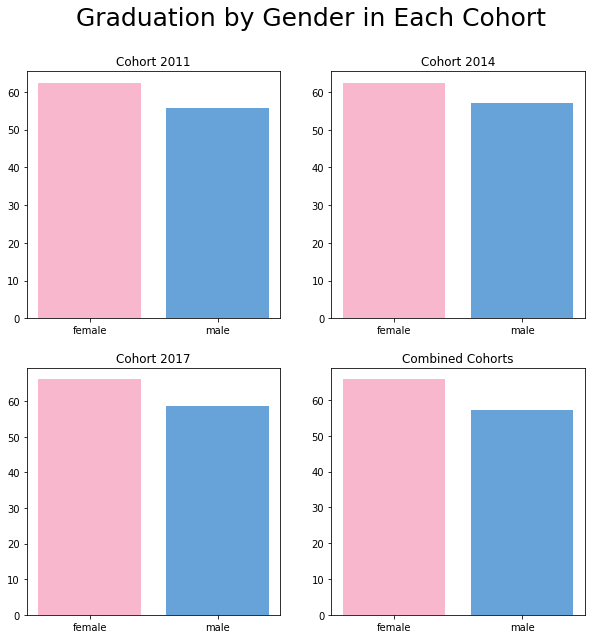

In [105]:
# Cohort 2011, 2014, 2017, and combined
font_color = 'black'
colors = ['#F8B7CD', '#67A3D9']
values = [[2445/(4120-73-125) * 100, 1937/(3732-103-153) * 100], [2849/(4676-104-8) * 100, 2347/(4230-105-9) * 100], [3140/(4842-86-7) * 100, 2366/(4129-85-6) * 100], [(2445+2849+3410)/(4120+4676+4842-86-7-73-125-104-8) * 100, (2347+1937+2366)/(3732+4230+4129-103-153-105-9-85-6) * 100]]
labels = ['female', 'male']
titles = ['Cohort 2011', 'Cohort 2014', 'Cohort 2017', 'Combined Cohorts']
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
for i, ax in enumerate(axs.flat):
    ax.bar(range(len(values[i])), height=values[i], color=colors, tick_label=labels)
    ax.set_title(titles[i])
# Set title, its position, and font size
fig.suptitle('Graduation by Gender in Each Cohort', x=0.52, y=.97, fontsize=25, color=font_color)
fig.patch.set_facecolor('white')
filename = 'graduation-gender-donut-chart'
plt.savefig(filename+'.png', transparent=True)

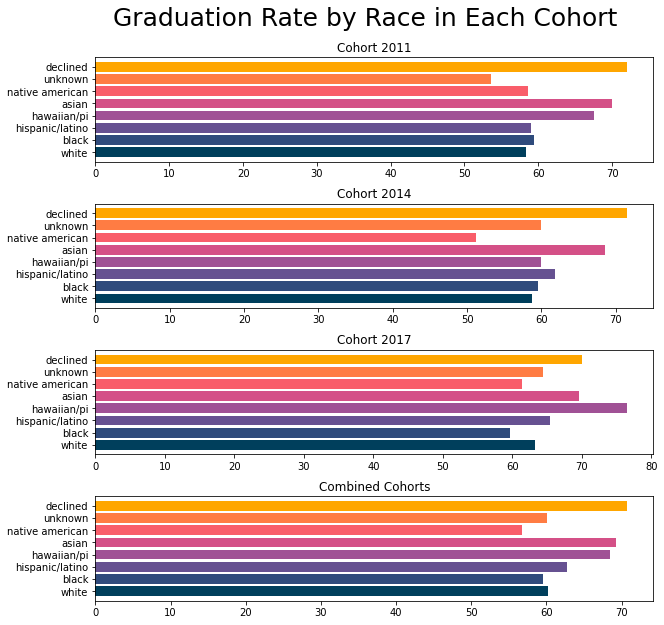

In [104]:
# Horizontal Bar 
font_color = 'black'
colors = ['#003f5c','#2f4b7c','#665191','#a05195','#d45087','#f95d6a','#ff7c43','#ffa600']
values = [[58.3, 59.4, 59.0, 67.6, 70.0, 58.6, 53.6, 72.0], 
          [58.7, 59.5, 61.8, 60.0, 68.6, 51.2, 60, 71.5],
          [63.3, 59.7, 65.5, 76.5, 69.6, 61.4, 64.4, 70.1], 
          [60.2, 59.6, 62.7, 68.5, 69.3, 56.8, 60.1, 70.7]]
labels = ('white', 'black', 'hispanic/latino', 'hawaiian/pi', 'asian', 'native american', 'unknown', 'declined')
titles = ['Cohort 2011', 'Cohort 2014', 'Cohort 2017', 'Combined Cohorts']
# Create subplots and a pie chart
fig, axs = plt.subplots(4, 1, figsize=(10, 10))
for i, ax in enumerate(axs.flat):
    ax.barh(labels, values[i], align='center', color=colors)
    ax.set_title(titles[i])
    ax.set_xlim([0, 80]) 
# # Set title, its position, and font size
fig.suptitle('Graduation Rate by Race in Each Cohort', x=0.5, y=.95, fontsize=25, color=font_color)
fig.patch.set_facecolor('white')
fig.subplots_adjust(wspace=2, hspace=0.4) 
filename = 'racial-graduation-barchart'
plt.savefig(filename+'.png', transparent=True)